<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day5_fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 살펴보기

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


데이터 전처리

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

np.random.seed(777)

# 0 ~ 1 범위로 만듭니다.(범위 줄여주기-> 스케일링)
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))


# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


데이터셋 만들기

In [ ]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print('Fashion-MNIST ready~')


Fashion-MNIST ready~


모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #커널 사이즈 필터 크기 3 x 3
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다. 2차원 -> 1차원
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])


모델 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

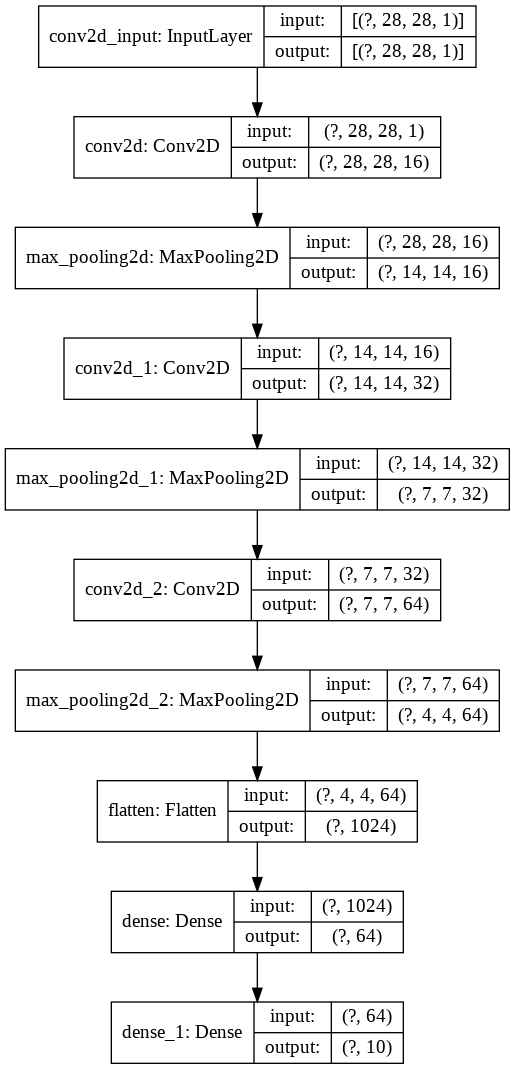

In [ ]:
import tensorflow as tf

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)
# 첫번째 input type의 맨 뒤에 1은 흑백, 3은 RGB

모델 설정하기

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])


모델 학습하기

In [ ]:
history = model.fit(x_train, y_train, 
          epochs = 30, 
          batch_size = 32, 
          validation_data = (x_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0207 - acc: 0.9934 - val_loss: 0.8566 - val_acc: 0.9114
Epoch 2/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0246 - acc: 0.9916 - val_loss: 0.8319 - val_acc: 0.9101
Epoch 3/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.8874 - val_acc: 0.9076
Epoch 4/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0220 - acc: 0.9927 - val_loss: 0.7804 - val_acc: 0.9097
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0185 - acc: 0.9938 - val_loss: 0.8796 - val_acc: 0.9113
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0204 - acc: 0.9942 - val_loss: 0.8309 - val_acc: 0.9111
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.8807 - val_acc: 0.9084
Epoch 8/30
1313/1313 [==============================] - 9s 7ms

모델 평가하기


In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.1159 - acc: 0.9028


[1.1159123182296753, 0.9028000235557556]

모델 학습 결과 그려보기


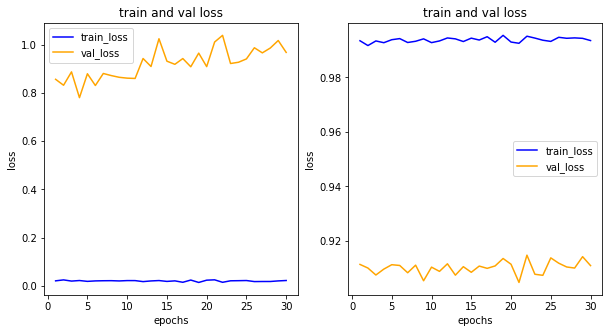

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()
